# Homework 2

In [35]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

## 1 Conceptual Basics

### 1.1 Conditional Probability

Given the following data table.


|      &#xfeff;| Male | Female |
|--------------|------|--------|
| Left Handed  | 30   | 40     |
| Right Handed | 50   | 60     |

Calculate the following quantities

#### 1.1.1 Find P(left-handed)

#### 1.1.2 What is the probability that your Female friend is left-handed?

#### 1.1.3 Given a random person on the stree what is the probability that the person is Left-handed Male?

#### 1.1.4 At a crime scene all evidence point to the fact that the crime is commited by a right-handed theif. What is the probability that the theif is a male?

### 1.2 Consider a two competing disease test kit performance from two startups for the same disease.

**Nice Pharmaceutical** and **New Medical**

The results of the clinical trial is shown as follow

| Nice Pharmaceutical | Positive Test | Negative Test |
|---------------------|---------------|---------------|
| Have Diesease       | 70            | 30            |
| Disease Free        | 10            | 90            |


| New Medical   | Positive Test | Negative Test |
|---------------|---------------|---------------|
| Have Diesease | 95            | 5             |
| Disease Free  | 30            | 70            |


Compute the following quantities for **both** startups.


#### 1.2.1 Positive Predictive Value

#### 1.2.2 Sensitivity

#### 1.2.3 Specificity

#### 1.2.4 Negative Predictive Value

#### 1.2.5 Which company's positive value is more belivable?

#### 1.2.6 If the disease were deadly and contagious like Ebola and we are subjecting everyone to the test, missing one patient could spell the end of humanity. Which startup would you purchase the test kit from? Justify your answer.

### 1.3 Likelihood

Consider 2 decks of cards. Both have 10 cards in total.
 - Deck A has 6 red cards and 4 black cards.
 - Deck B has 7 red cards and 3 red cars.

#### 1.3.1 Suppose that you draw one card at a time and put the card back in the pile everytime so that pile always has 10 cards. You draw the card 3 times and 2 out of 3 cards are red. Which deck is more likely to be in your hand? Justify your answer with calculation.

#### 1.3.2 Suppose that you draw one card at a time but you *never* put it back; meaning when you draw the second card you only have 9 card left. You draw the card 3 times and the cards comes out to be red, black then red(in that order). Which deck has more likelihood?

## 2 Bayes' Theorem

Refer to the data we use in class. Use Naives Bayes Assumption to find the probility that a mushroom that has

- white **veil_color**
- flaring **ring_type**
- grass **habitat**

to be poisonous.

In [43]:
import keyword
df = pd.read_csv('mushrooms_train.csv')
#fix messy column names
#print(df.columns)
df.columns = df.columns \
    .str.strip() \
    .str.lower() \
    .str.replace(' ', '_') \
    .str.replace('(', '') \
    .str.replace(')', '') \
    .str.replace('-','_') \
    .map(lambda x: 'x'+x if x in keyword.kwlist else x )

In [44]:
df.head()

,xclass,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## 3 Multi Dimensional Logistic.

We can take the idea of logistic to multidimension easily. By just replacing
$$
s = m x + c \longrightarrow s = a x_1 + b x_2 + c
$$

AJ Piti and AJ Pat sometimes left their backpack in the lecture room. New and Nice have too much free time at their disposal so they start collecting the data from the backpack the AJ's left.

The data they collect are

- $x_1$ The total weight of the items in the *front* slot of the backpack.
- $x_2$ The total weight of the item in the *back* slot of the backpack.
- $y$ Whose backpack it belongs to. (1 for AJ Piti and 0 for AJ Pat)

One day AJ Metha found an unknown backpack left inside the lecture room. So, he went to New and Nice for detective help figure out whose backpack it is. New and Nice measured the weight of the items in the front backpack and the back and they are 125 and 100 accordingly.

In [32]:
#dont' touch this
np.random.seed(9877)
ndata = 250
x1s = np.random.random(ndata)*200
x2s = np.random.random(ndata)*200

def theta(s):
    return 1/(1+np.exp(-s))

ps = 0.01*(2*x1s + 3*x2s - 500)
rs = np.random.random(ndata)

ys = rs > theta(ps)
ys = ys.astype(float)

Text(0,0.5,'back')

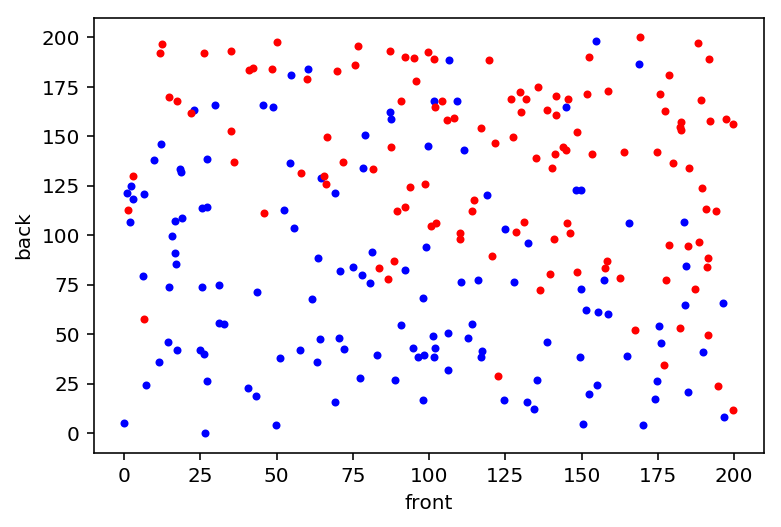

In [33]:
plt.plot(x1s[ys>0.5], x2s[ys>0.5], '.b')
plt.plot(x1s[ys<0.5], x2s[ys<0.5], '.r')
plt.xlabel('front')
plt.ylabel('back')

### 3.1 Find the probability that the backpack belongs to AJ Piti.

Hint: You will need to find the **best** $a,b,c$. Then, use it to find the probability.

### 3.2 Find the equation for the 50% line. (All the backpack on that line has 50% chance of belonging to AJ Piti). Draw that line along with the data points.

Hint. $\theta(0) = 0.5$